In [74]:
# !pip install warnings

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/stud.csv")


### Show data shape
### Show data head
### Data Checks to perform
<ul>
<li> Check Missing Values 
<li> Check Duplicates 
<li> Check data type 
<li> Check the number of unique values of each column 
<li> Check statistics of data set
<li> Check various categories present in the different categorical column

In [4]:
df.shape

(1000, 8)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There is no missing values

In [7]:
df.duplicated().sum()

0

#### There are no duplicates

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<li> Means are close to each other 
<li> std are also close
<li> min of maths = 10, writing  = 10, reading = 17

In [11]:
print("Categories in gender: ",end = ' ')
print(df['gender'].unique())

print("Categories in race/ethnicity: ",end = ' ')
print(df['race/ethnicity'].unique())

print("Categories in parental level of education: ",end = ' ')
print(df['parental level of education'].unique())

print("Categories in lunch: ",end = ' ')
print(df['lunch'].unique())

print("Categories in test preparation course: ",end = ' ')
print(df['test preparation course'].unique())


Categories in gender:  ['female' 'male']
Categories in race/ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:  ['standard' 'free/reduced']
Categories in test preparation course:  ['none' 'completed']


In [12]:
# define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} numerical features : {}".format(len(numerical_features),numerical_features))
print("We have {} categorical features : {}".format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns for total score and average

In [13]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = round(df['total_score']/3,2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [14]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f'Number of students with full marks in math: {math_full}')
print(f'Number of students with full marks in reading: {reading_full}')
print(f'Number of students with full marks in writing: {writing_full}')

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [15]:
reading_less_20 = df[df['reading score']<=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in math: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {writing_less_20}')

Number of students with less than 20 marks in math: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


#### Insights
<li> Students have performed worst in maths 
<li> Students have performed best in reading 

#### Histogram or KDE

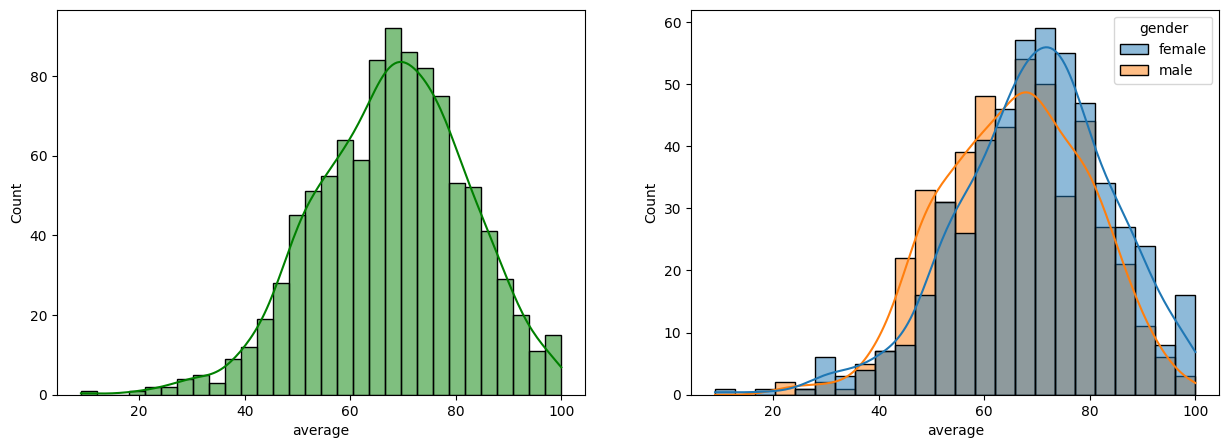

In [16]:
fig, axis = plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
sns.histplot(data = df,x = 'average',bins = 30,kde=True,color = 'g')
plt.subplot(122)
sns.histplot(data = df,x = 'average',kde = True,hue = 'gender')
plt.show()


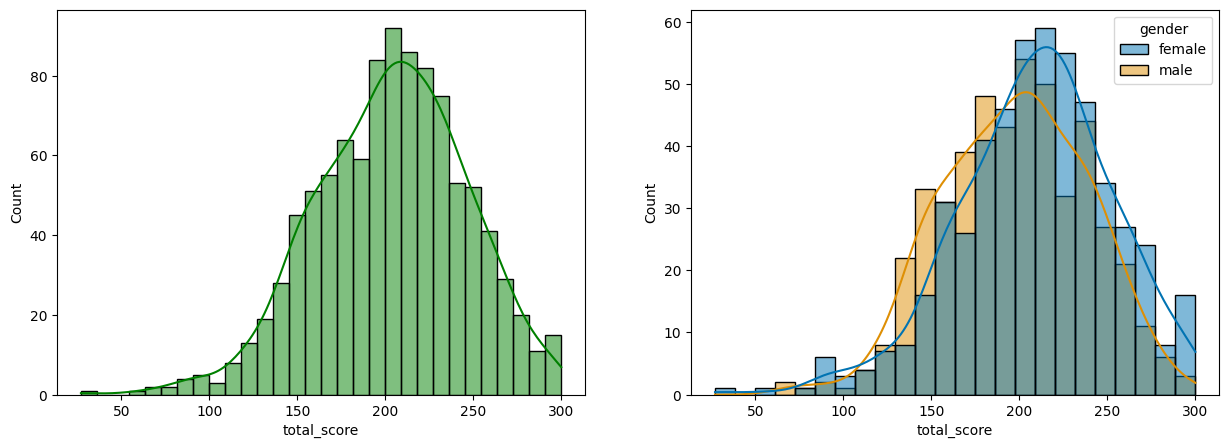

In [17]:
fig, axis = plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
sns.histplot(data = df,x = 'total_score',bins = 30,kde=True,color = 'g',palette ='colorblind')
plt.subplot(122)
sns.histplot(data = df,x = 'total_score',kde = True,hue = 'gender',palette ='colorblind')
plt.show()

#### Insight
<li> Female students tend to perform better than male

<Axes: xlabel='average', ylabel='Count'>

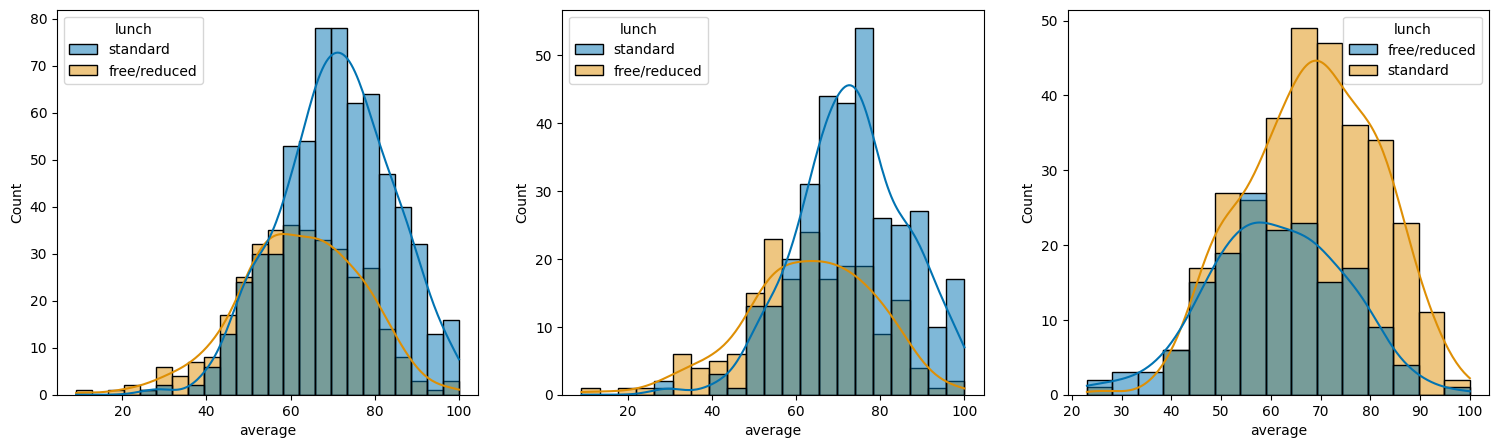

In [18]:
plt.subplots(1,3,figsize = (25,5))
plt.subplot(141)
sns.histplot(data = df,x = 'average',hue = 'lunch', kde = 'True',palette ='colorblind')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],x = 'average',hue = 'lunch', kde = 'True',palette ='colorblind')
plt.subplot(143)
sns.histplot(data = df[df['gender']=='male'],x = 'average',hue = 'lunch', kde = 'True',palette ='colorblind')

#### Insights
<li> Standard lunch helps perform well in exam
<li> Standard lunch helps perform well in exam be it male or female

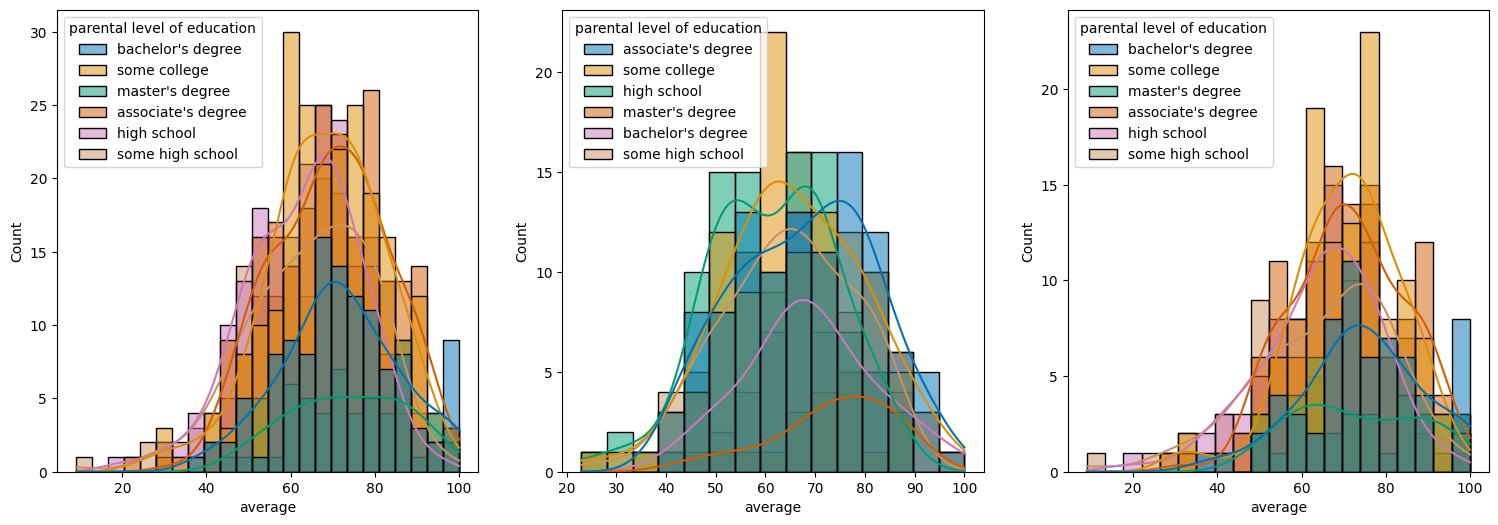

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education',palette ='colorblind')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education',palette ='colorblind')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education',palette ='colorblind')
plt.show()

#### Insights
<li>In general parent's education don't help student perform well in exam.
<li> 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
<li> 3rd plot we can see there is no effect of parent's education on female students.

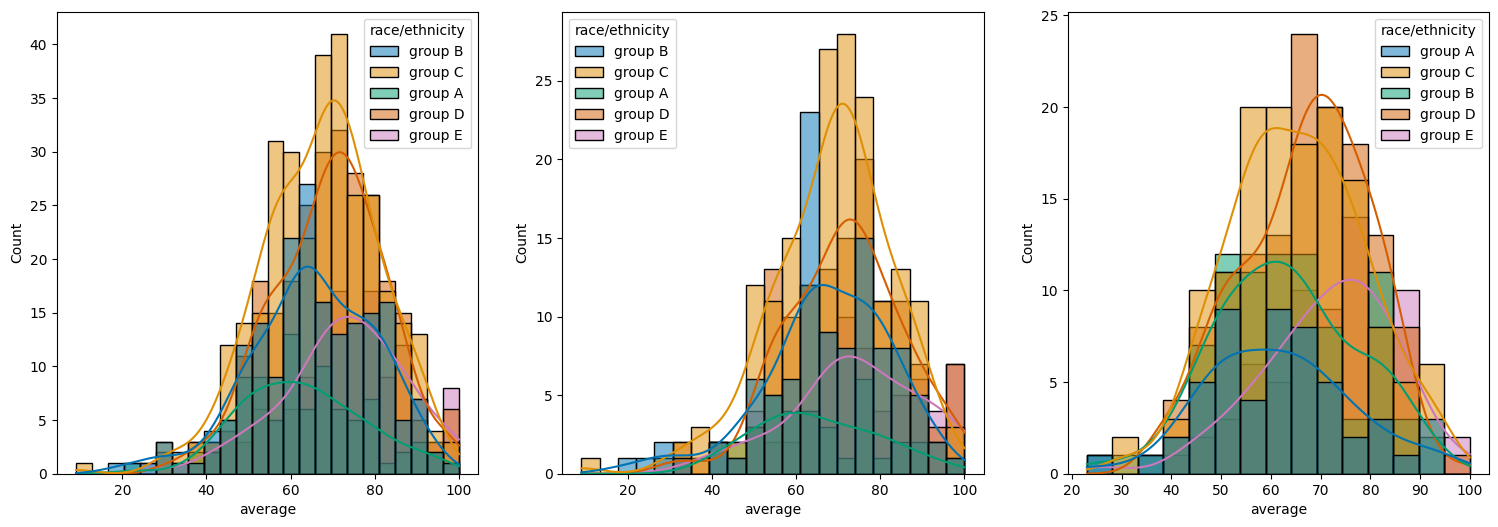

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity',palette ='colorblind')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity',palette ='colorblind')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity',palette ='colorblind')
plt.show()

#### Insights
<li> Students of group A and group B tends to perform poorly in exam.
<li> Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

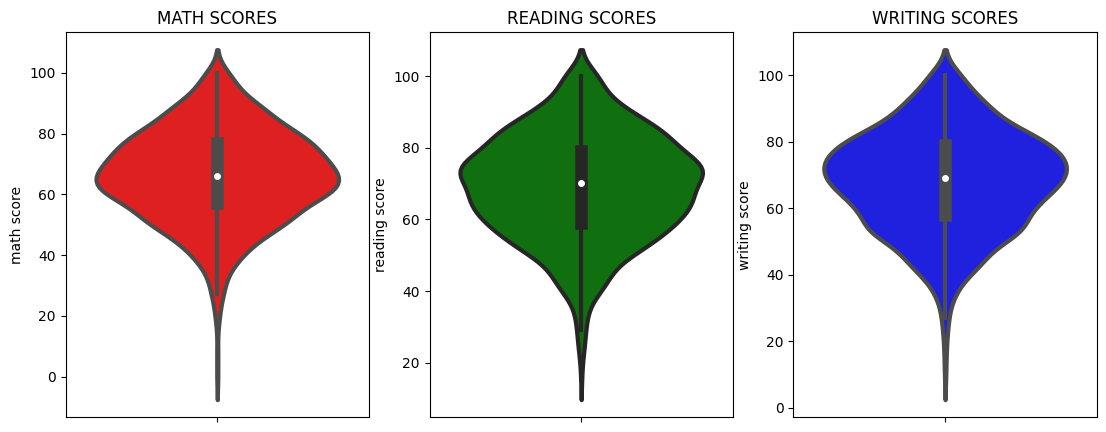

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
<li> From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate Analysis using pieplot

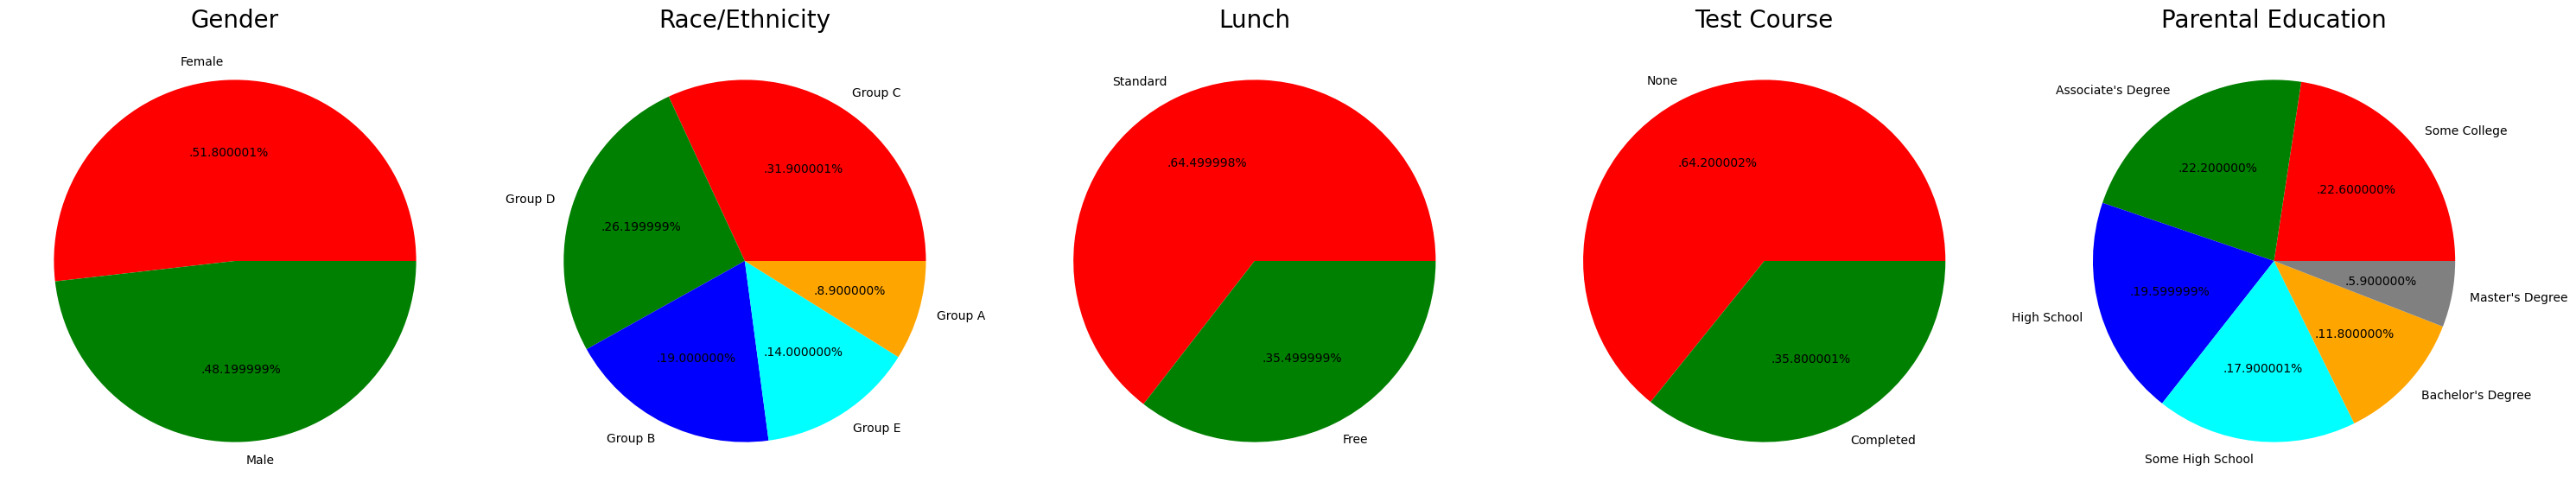

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Insights
<li> Number of Male and Female students is almost equal
<li> Number students are greatest in Group C
<li> Number of students who have standard lunch are greater
<li> Number of students who have not enrolled in any test preparation course is greater
<li>Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### Feature Wise Visualization

#### Gender Column
<li> How is gender distribution
<li> has gender any impact on students performance?

#### Univariate Analysis (How is gender distribution?)

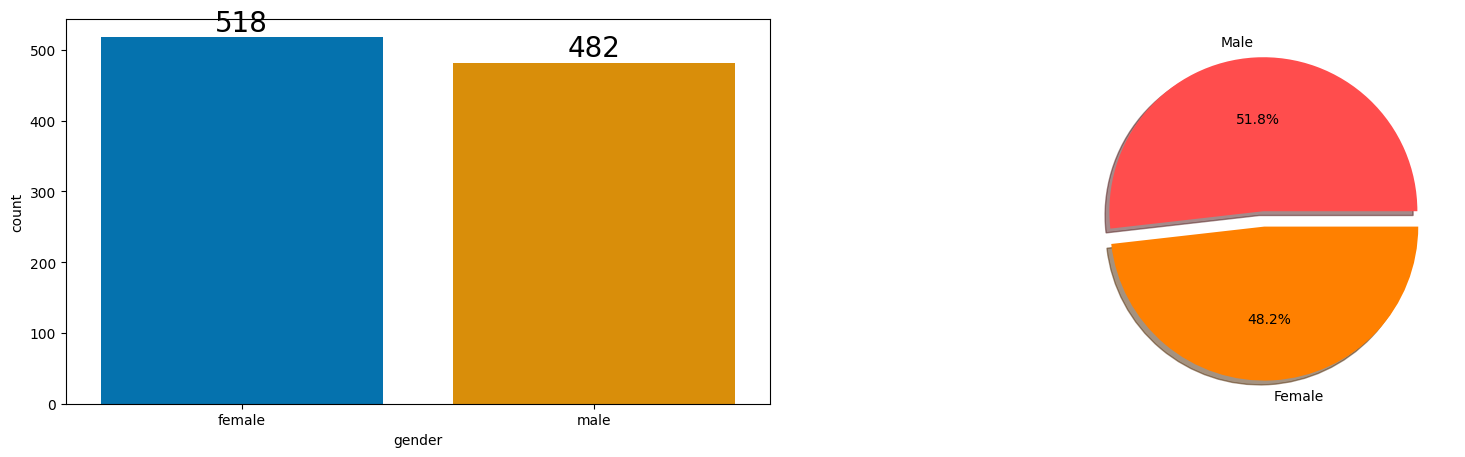

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=df['gender'],data=df,palette ='colorblind',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insight
<li> Gender is balanced in the data

#### BIVARIATE ANALYSIS ( Has gender any impact on student's performance ? )

In [51]:
gender_group = df.groupby('gender').sum()
gender_group

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
gender,,,,,,,,,
female,group Bgroup Cgroup Bgroup Bgroup Bgroup Bgrou...,bachelor's degreesome collegemaster's degreeas...,standardstandardstandardstandardstandardfree/r...,nonecompletednonenonecompletednonenonenonenone...,32962,37611,37538,108111,36037.00
male,group Agroup Cgroup Bgroup Dgroup Cgroup Dgrou...,associate's degreesome collegesome collegehigh...,free/reducedstandardfree/reducedfree/reducedst...,nonenonenonecompletednonenonecompletednonecomp...,33127,31558,30516,95201,31733.58


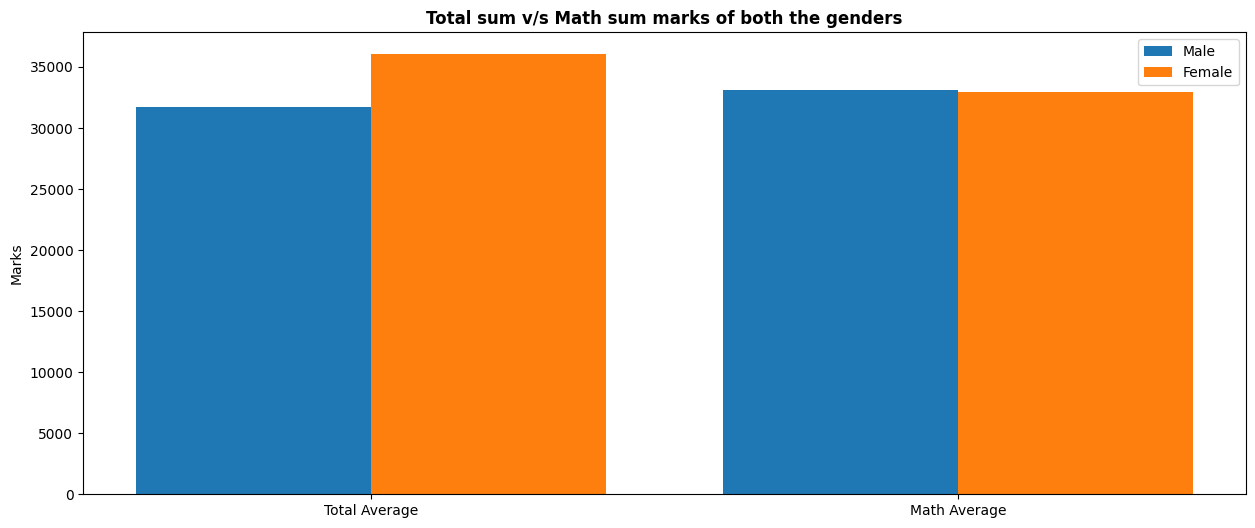

In [52]:
plt.figure(figsize=(15, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total sum v/s Math sum marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
<li>On an average females have a better overall score than men.
<li>whereas males have scored higher in Maths.

#### RACE/EHNICITY COLUMN
<li>How is Group wise distribution ?
<li>Is Race/Ehnicity has any impact on student's performance ?

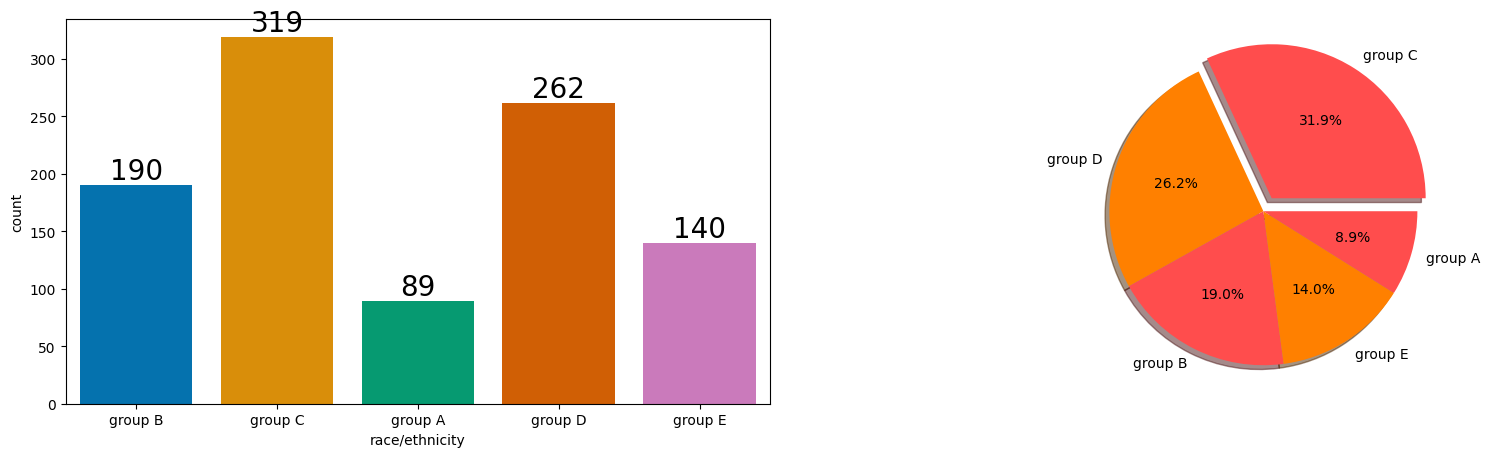

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x=df['race/ethnicity'],data=df,palette ='colorblind',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights
<li>Most of the student belonging from group C /group D.
<li>Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

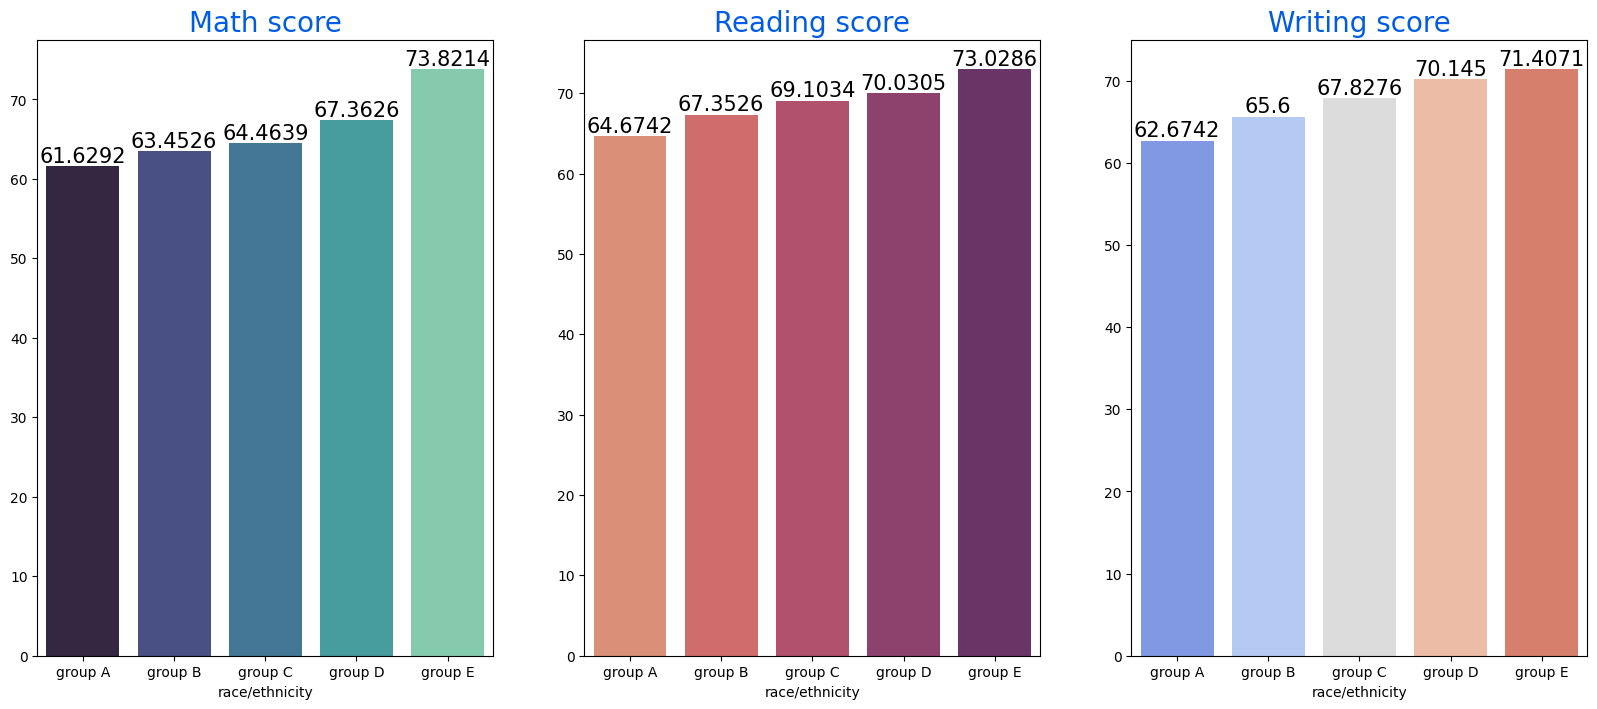

In [48]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
<li>Group E students have scored the highest marks.
<li>Group A students have scored the lowest marks.
<li>Students from a lower Socioeconomic status have a lower avg in all course subjects

#### PARENTAL LEVEL OF EDUCATION COLUMN
<li>What is educational background of student's parent ?
<li>Is parental education has any impact on student's performance ?
<li>UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

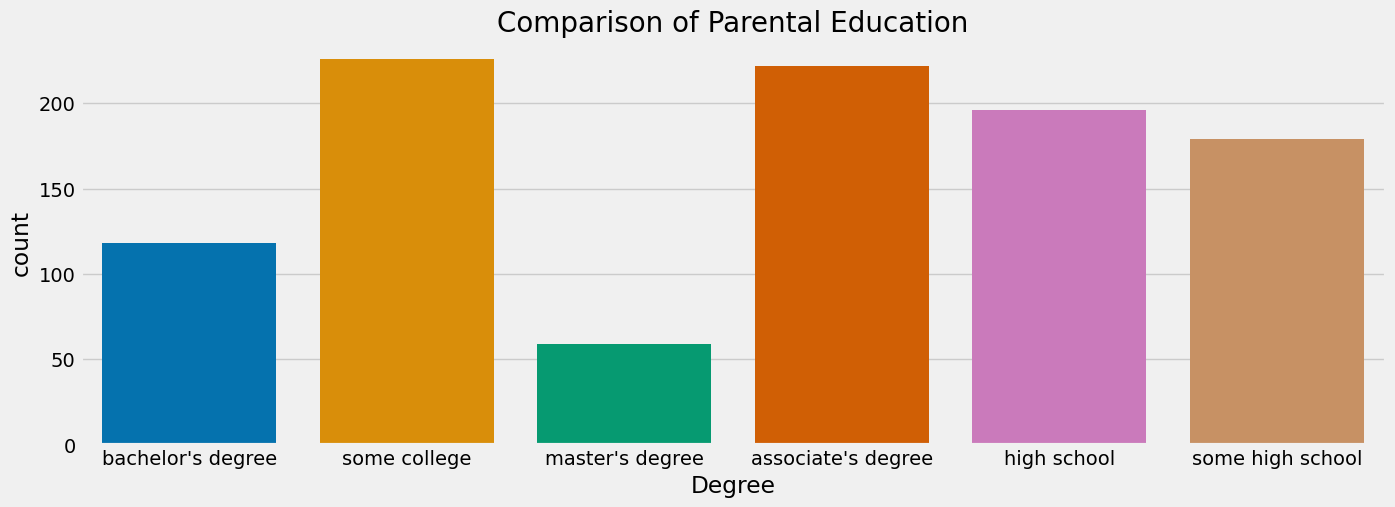

In [73]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'],data=df,palette ='colorblind',saturation=0.95)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights
<li>Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Has parental education any impact on student's performance ? )

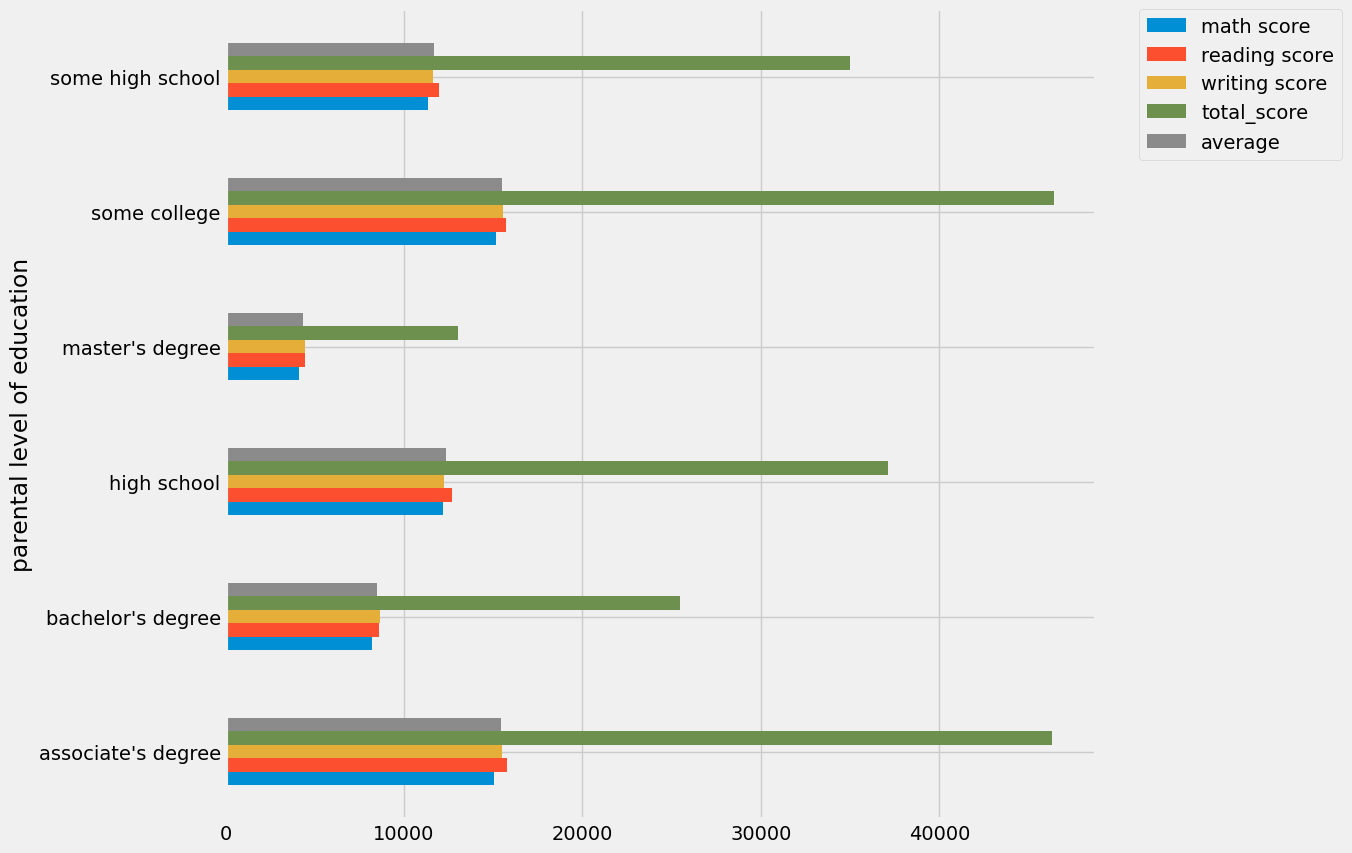

In [76]:
df.groupby('parental level of education').agg('sum').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
<li>The score of student whose parents possess master and bachelor level education are higher than others.

#### LUNCH COLUMN
<li>Which type of lunch is most common amoung students ?
<li>What is the effect of lunch type on test results?</li>

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

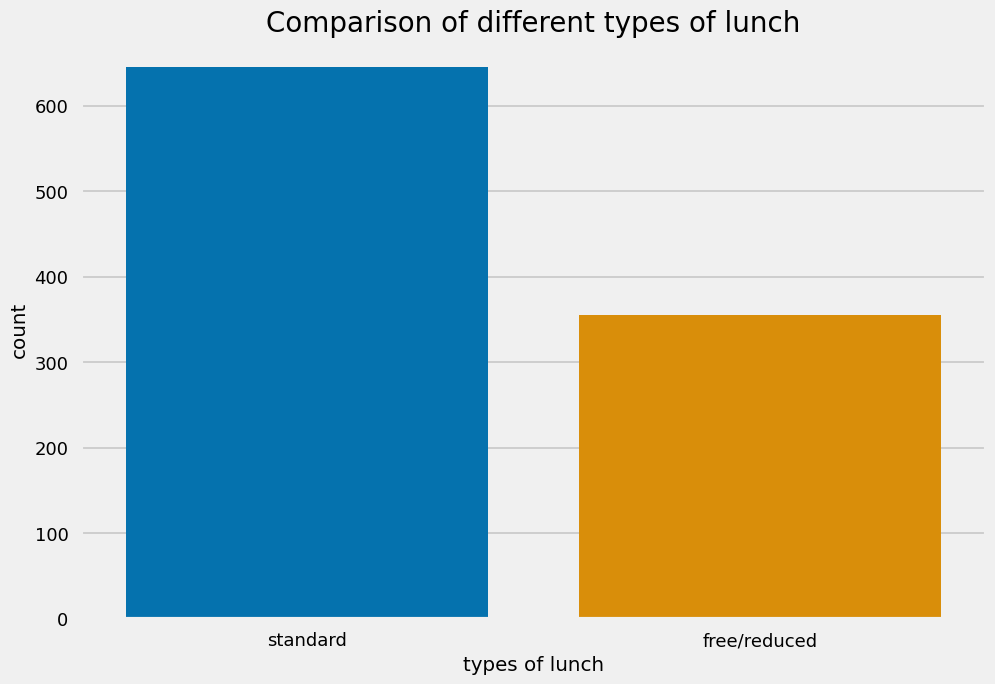

In [80]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('seaborn-talk')
sns.countplot(x=df['lunch'],data=df,palette ='colorblind',saturation=0.95)
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights
<li>Students being served Standard lunch was more than free lunch<br />

#### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

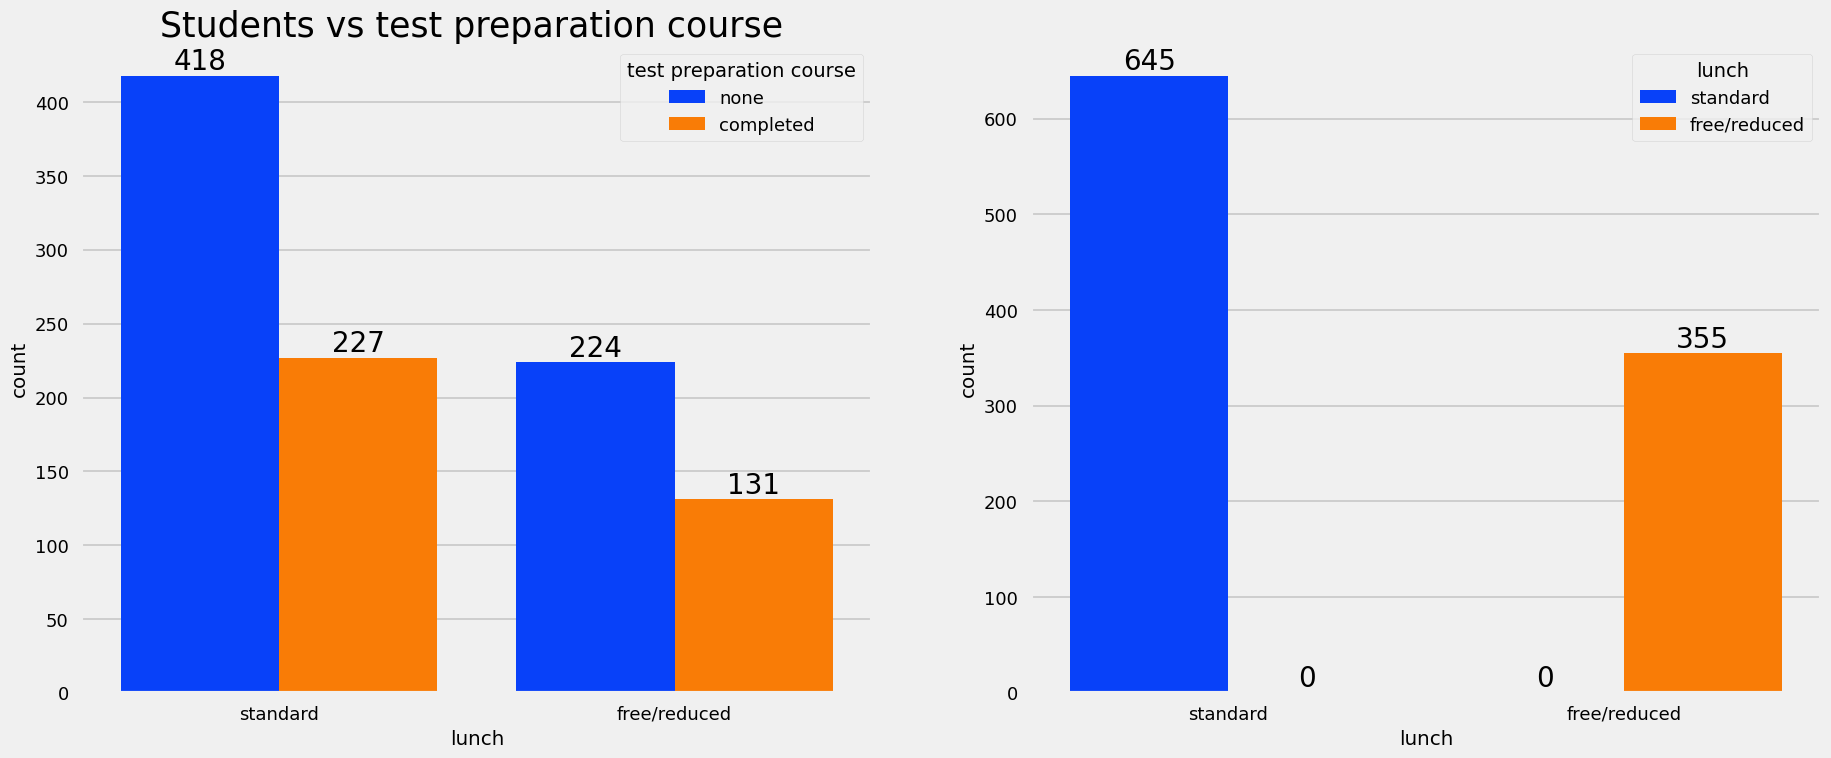

In [82]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insight
<li>Students who get Standard Lunch tend to perform better than students who got free/reduced lunch<br>

#### TEST PREPARATION COURSE COLUMN
<li>Which type of lunch is most common amoung students ?
<li>Is Test prepration course has any impact on student's performance ?<br>

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

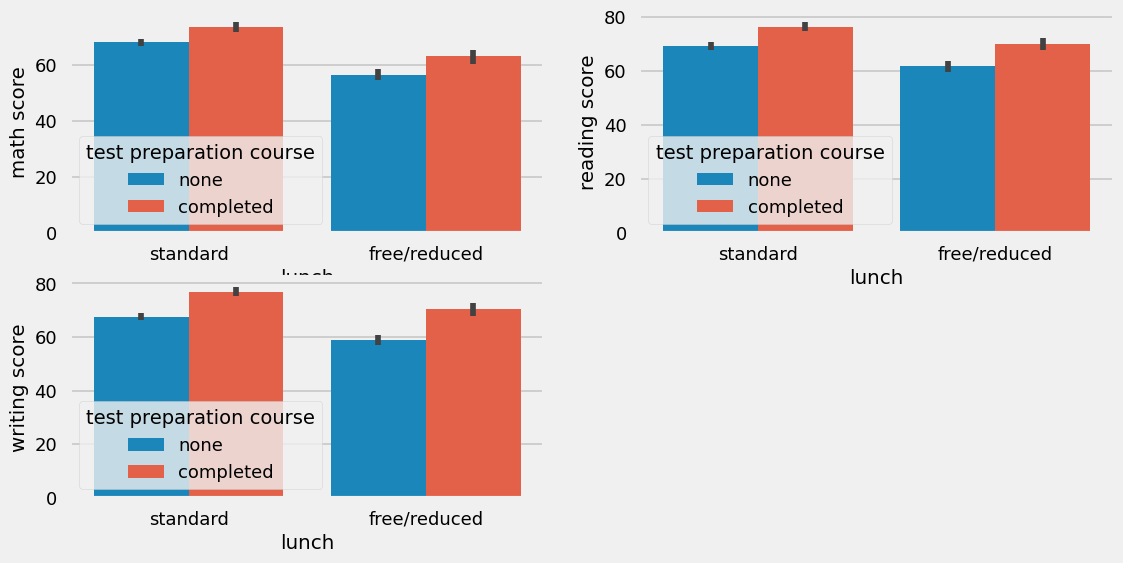

In [83]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

#### Insights
<li>Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course<br>

####  CHECKING OUTLIERS

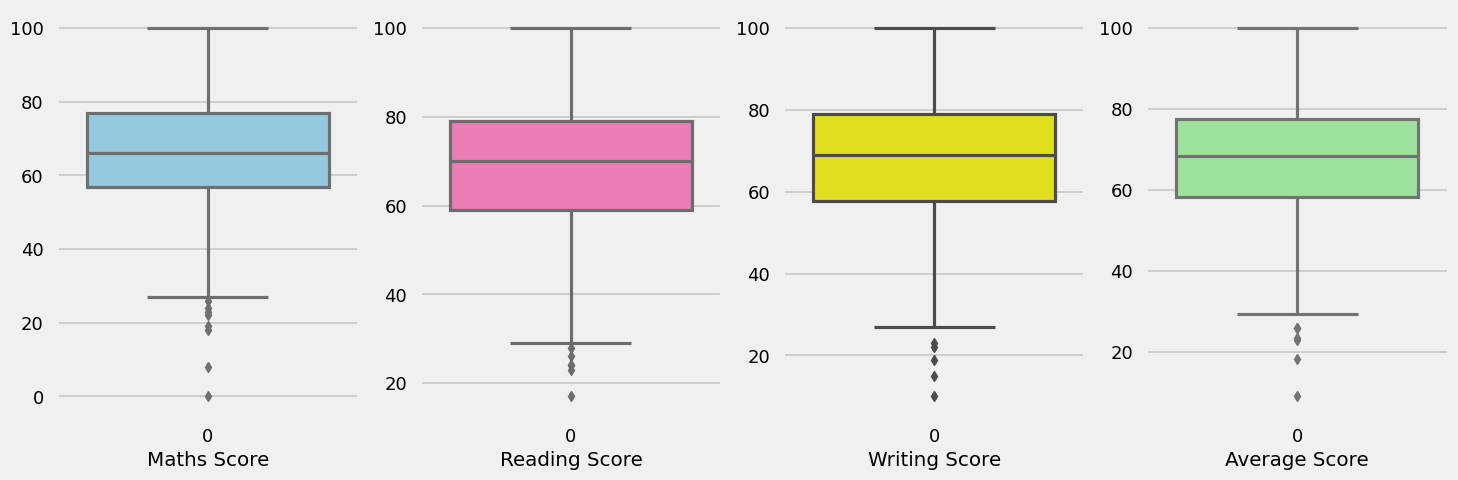

In [87]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.xlabel("Maths Score")
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.xlabel("Reading Score")
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.xlabel("Writing Score")
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.xlabel("Average Score")
plt.show()

#### MUTIVARIATE ANALYSIS USING PAIRPLOT

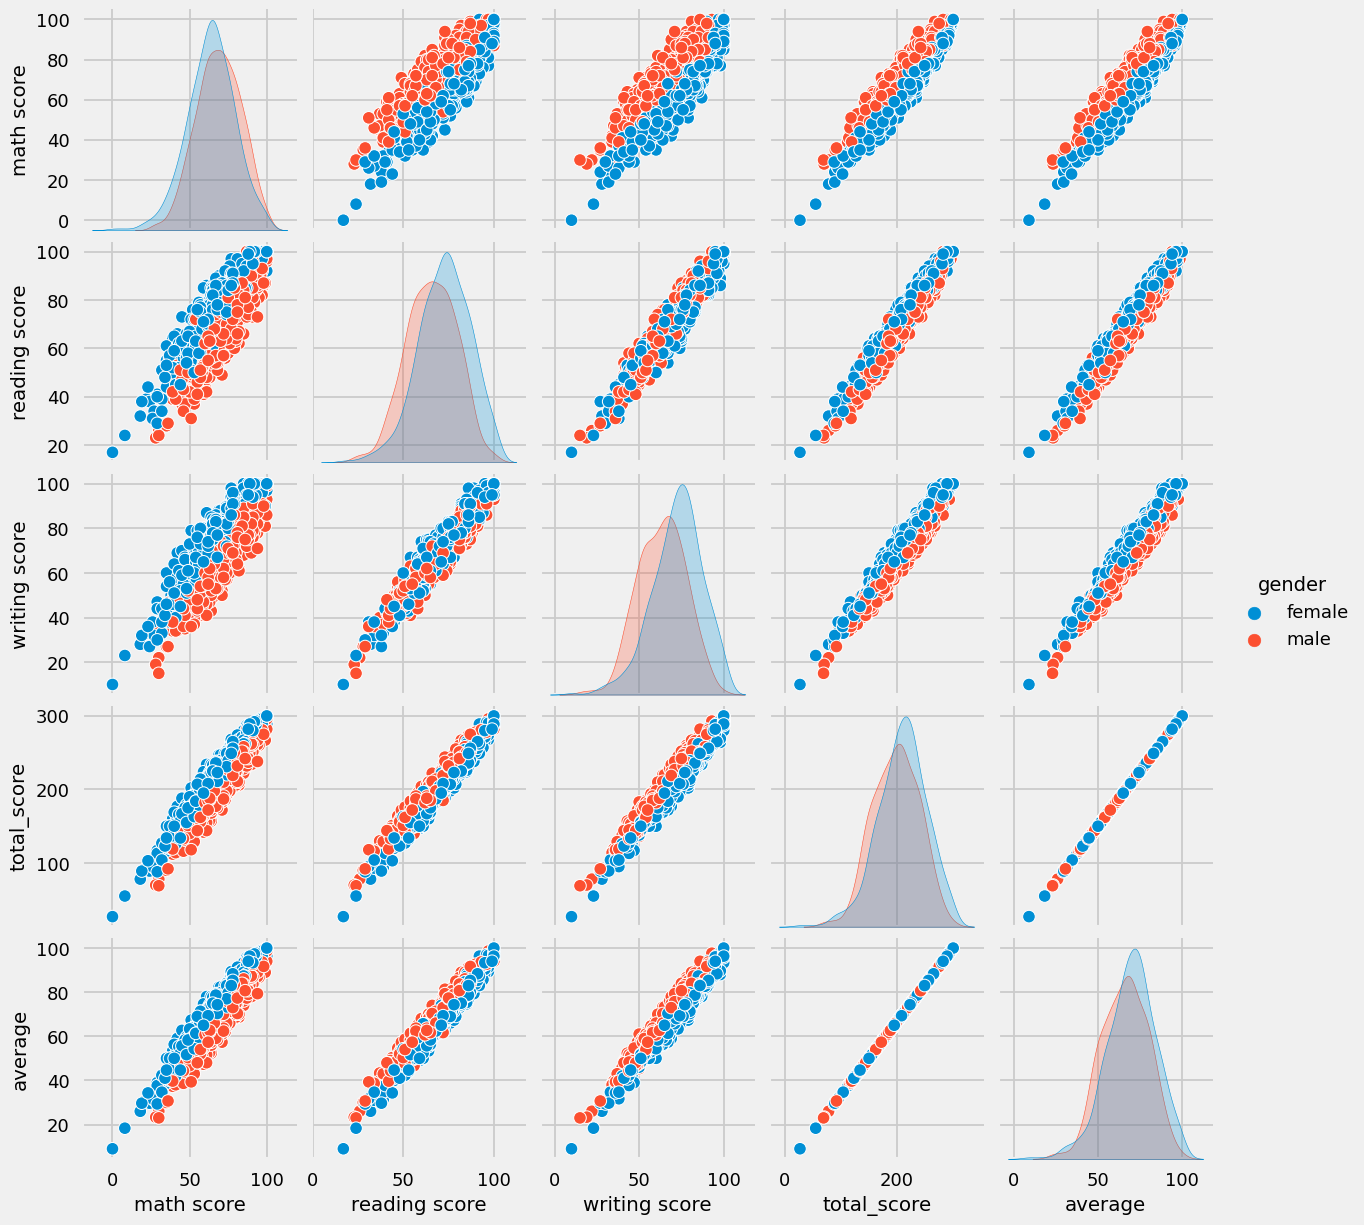

In [88]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
<li>From the above plot it is clear that all the scores increase linearly with each other.

#### Conclusions
<li>Student's Performance is related with lunch, race, parental level education
<li>Females lead in pass percentage and also are top-scorers
<li>Student's Performance is not much related with test preparation course
<li>Finishing preparation course is benefitial.